<a href="https://colab.research.google.com/github/Leonelts13/DispositivosMoviles/blob/main/Notebooks/Deber1/modelData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><strong>DATA ANALYSIS</strong></h1></center>


* __authors__ = [@Leonelts13](https://github.com/Leonelts13/DispositivosMoviles/tree/626578a8cfa60096e8d92dbf520c8c644ddda4c7/Notebooks/Deber1)
* __date__ = "20/12/2023"
* __version__ = "1.0.0"
* __license__ = "GPL"
* __title__ = "Interpretacion, comprension  y modelamiento de la data"
* __keywords__ = "Machine Learning, K-Means, Olympic Games, Medaltally, Data Analysis"

# 1. Pre Requisitos

In [1]:
# Instalación de las librerias o dependencias necesarias
!pip install pandas seaborn matplotlib scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Para graficación
from sklearn.cluster import KMeans # Para el modelamiento

# 2. Carga de la Data

In [3]:
# Ubicacion del archivo de datos
url = 'OlympicGames_Europe_MedalTally.csv' # external url?

In [4]:
# Se carga el archvio csv con pandas DataFrame
data = pd.read_csv(url) # Recupera los datos en formato csv a tipo dataframe (Estructura de datos bidimensional)
data.head() # Visualiza los 5 primeros datos del dataframe

,Unnamed: 0,País,N.º Juegos de verano,Oro,Plata,Bronce,Total_5,N.º Juegos de invierno,Oro.1,Plata.1,Bronce.1,Total_10,N° Juegos Total,Oro.2,Plata.2,Bronce.2,Total_15
0,0,Alemania (GER)[3][4],17,239,267,291,797,12,112,104,70,286,29,351,371,361,1083
1,1,Alemania Occidental (FRG)[3],5,56,67,81,204,7,11,15,13,39,12,67,82,94,243
2,2,Alemania Oriental (GDR)[3],5,153,129,127,409,6,39,36,35,110,11,192,165,162,519
3,3,Armenia (ARM),7,2,8,8,18,7,0,0,0,0,14,2,8,8,18
4,4,Atletas Olímpicos de Rusia (OAR)[5],0,0,0,0,0,1,2,6,9,17,1,2,6,9,17


# 3. Inspeccion de la data

In [5]:

# Visualizamos el DataFrame
data

,Unnamed: 0,País,N.º Juegos de verano,Oro,Plata,Bronce,Total_5,N.º Juegos de invierno,Oro.1,Plata.1,Bronce.1,Total_10,N° Juegos Total,Oro.2,Plata.2,Bronce.2,Total_15
0,0,Alemania (GER)[3][4],17,239,267,291,797,12,112,104,70,286,29,351,371,361,1083
1,1,Alemania Occidental (FRG)[3],5,56,67,81,204,7,11,15,13,39,12,67,82,94,243
2,2,Alemania Oriental (GDR)[3],5,153,129,127,409,6,39,36,35,110,11,192,165,162,519
3,3,Armenia (ARM),7,2,8,8,18,7,0,0,0,0,14,2,8,8,18
4,4,Atletas Olímpicos de Rusia (OAR)[5],0,0,0,0,0,1,2,6,9,17,1,2,6,9,17
5,5,Austria (AUT),28,22,37,43,102,24,71,88,91,250,52,93,125,134,352
6,6,Azerbaiyán (AZE),7,7,14,28,49,6,0,0,0,0,13,7,14,28,49
7,7,Bélgica (BEL),27,46,57,63,166,21,2,2,4,8,48,48,59,67,174
8,8,Bielorrusia (BLR),7,13,30,42,85,7,8,7,5,20,14,21,37,47,105
9,9,Bohemia (BOH)[6],3,0,1,3,4,0,0,0,0,0,3,0,1,3,4


In [6]:
# Remove unnecesary cols
# https://www.educative.io/answers/how-to-delete-a-column-in-pandas
# https://sparkbyexamples.com/pandas/pandas-drop-multiple-columns-by-index
# data.drop('a', inplace=True, axis=1)
data = data.drop(data.columns[[0]],axis = 1)
data

,País,N.º Juegos de verano,Oro,Plata,Bronce,Total_5,N.º Juegos de invierno,Oro.1,Plata.1,Bronce.1,Total_10,N° Juegos Total,Oro.2,Plata.2,Bronce.2,Total_15
0,Alemania (GER)[3][4],17,239,267,291,797,12,112,104,70,286,29,351,371,361,1083
1,Alemania Occidental (FRG)[3],5,56,67,81,204,7,11,15,13,39,12,67,82,94,243
2,Alemania Oriental (GDR)[3],5,153,129,127,409,6,39,36,35,110,11,192,165,162,519
3,Armenia (ARM),7,2,8,8,18,7,0,0,0,0,14,2,8,8,18
4,Atletas Olímpicos de Rusia (OAR)[5],0,0,0,0,0,1,2,6,9,17,1,2,6,9,17
5,Austria (AUT),28,22,37,43,102,24,71,88,91,250,52,93,125,134,352
6,Azerbaiyán (AZE),7,7,14,28,49,6,0,0,0,0,13,7,14,28,49
7,Bélgica (BEL),27,46,57,63,166,21,2,2,4,8,48,48,59,67,174
8,Bielorrusia (BLR),7,13,30,42,85,7,8,7,5,20,14,21,37,47,105
9,Bohemia (BOH)[6],3,0,1,3,4,0,0,0,0,0,3,0,1,3,4


In [7]:
# Inspeccionamos el tipo de dato de cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   País                    55 non-null     object
 1   N.º Juegos de verano    55 non-null     int64 
 2   Oro                     55 non-null     int64 
 3   Plata                   55 non-null     int64 
 4   Bronce                  55 non-null     int64 
 5   Total_5                 55 non-null     int64 
 6   N.º Juegos de invierno  55 non-null     int64 
 7   Oro.1                   55 non-null     int64 
 8   Plata.1                 55 non-null     int64 
 9   Bronce.1                55 non-null     int64 
 10  Total_10                55 non-null     int64 
 11  N° Juegos Total         55 non-null     int64 
 12  Oro.2                   55 non-null     int64 
 13  Plata.2                 55 non-null     int64 
 14  Bronce.2                55 non-null     int64 
 15  Total_15

In [8]:
# Realizamos una descripción de los estadísticos básicos para comprender la data
data.describe()

,N.º Juegos de verano,Oro,Plata,Bronce,Total_5,N.º Juegos de invierno,Oro.1,Plata.1,Bronce.1,Total_10,N° Juegos Total,Oro.2,Plata.2,Bronce.2,Total_15
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,15.218182,57.327273,60.272727,65.363636,182.963636,12.272727,16.218182,15.636364,16.218182,48.072727,27.400000,73.545455,75.909091,81.581818,231.054545
std,9.685214,84.554399,81.465843,84.469009,248.544725,7.834999,30.993244,28.852347,27.408225,86.421203,17.186989,104.817446,98.931191,101.849688,303.692304
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,7.000000,3.500000,7.000000,8.000000,19.500000,7.000000,0.000000,0.000000,0.000000,0.000000,14.000000,4.000000,7.000000,9.500000,21.000000
50%,15.000000,20.000000,28.000000,28.000000,83.000000,9.000000,2.000000,2.000000,3.000000,8.000000,24.000000,26.000000,32.000000,36.000000,101.000000
75%,24.500000,57.500000,85.000000,82.500000,219.000000,20.500000,10.500000,9.500000,14.000000,34.000000,44.000000,91.500000,111.500000,132.500000,340.500000
max,29.000000,395.000000,324.000000,315.000000,1010.000000,24.000000,148.000000,134.000000,123.000000,405.000000,53.000000,473.000000,376.000000,361.000000,1204.000000


# 4. Depuración de la data

In [20]:
# Correccion de lo campos mal formateados (Titulos y Rendimiento)
# data.apply(lambda x : fixTitulos(x['Títulos']), axis=1)
#data['Títulos'] = data.apply(lambda x: fixTitulos(x['Títulos']), axis=1) # Aplicamos la funcion fixTitulos() a la columna [Titulos]
# data.apply(lambda x : fixRend(x['Rend.']), axis=1)
#data['Rend.'] = data['Rend.'].apply(lambda x: fixRend(x)) # Aplicamos la funcion fixRend() a la columna [Rend]

# Cambia el nombre de la columna
data.rename(columns={'Total_5': 'Total_Medallas_Verano'}, inplace=True)
data.rename(columns={'Total_10': 'Total_Medallas_Invierno'}, inplace=True)
data.rename(columns={'Total_15': 'Total_Medallas_Global'}, inplace=True)
data

,País,N.º Juegos de verano,Oro,Plata,Bronce,Total_Medallas_Verano,N.º Juegos de invierno,Oro.1,Plata.1,Bronce.1,Total_Medallas_Invierno,N° Juegos Total,Oro.2,Plata.2,Bronce.2,Total_Medallas_Global
0,Alemania (GER)[3][4],17,239,267,291,797,12,112,104,70,286,29,351,371,361,1083
1,Alemania Occidental (FRG)[3],5,56,67,81,204,7,11,15,13,39,12,67,82,94,243
2,Alemania Oriental (GDR)[3],5,153,129,127,409,6,39,36,35,110,11,192,165,162,519
3,Armenia (ARM),7,2,8,8,18,7,0,0,0,0,14,2,8,8,18
4,Atletas Olímpicos de Rusia (OAR)[5],0,0,0,0,0,1,2,6,9,17,1,2,6,9,17
5,Austria (AUT),28,22,37,43,102,24,71,88,91,250,52,93,125,134,352
6,Azerbaiyán (AZE),7,7,14,28,49,6,0,0,0,0,13,7,14,28,49
7,Bélgica (BEL),27,46,57,63,166,21,2,2,4,8,48,48,59,67,174
8,Bielorrusia (BLR),7,13,30,42,85,7,8,7,5,20,14,21,37,47,105
9,Bohemia (BOH)[6],3,0,1,3,4,0,0,0,0,0,3,0,1,3,4


In [21]:
# Inspeccionamos el tipo de dato de cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   País                     55 non-null     object
 1   N.º Juegos de verano     55 non-null     int64 
 2   Oro                      55 non-null     int64 
 3   Plata                    55 non-null     int64 
 4   Bronce                   55 non-null     int64 
 5   Total_Medallas_Verano    55 non-null     int64 
 6   N.º Juegos de invierno   55 non-null     int64 
 7   Oro.1                    55 non-null     int64 
 8   Plata.1                  55 non-null     int64 
 9   Bronce.1                 55 non-null     int64 
 10  Total_Medallas_Invierno  55 non-null     int64 
 11  N° Juegos Total          55 non-null     int64 
 12  Oro.2                    55 non-null     int64 
 13  Plata.2                  55 non-null     int64 
 14  Bronce.2                 55 non-null     int

# 4. Análisis de la Data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


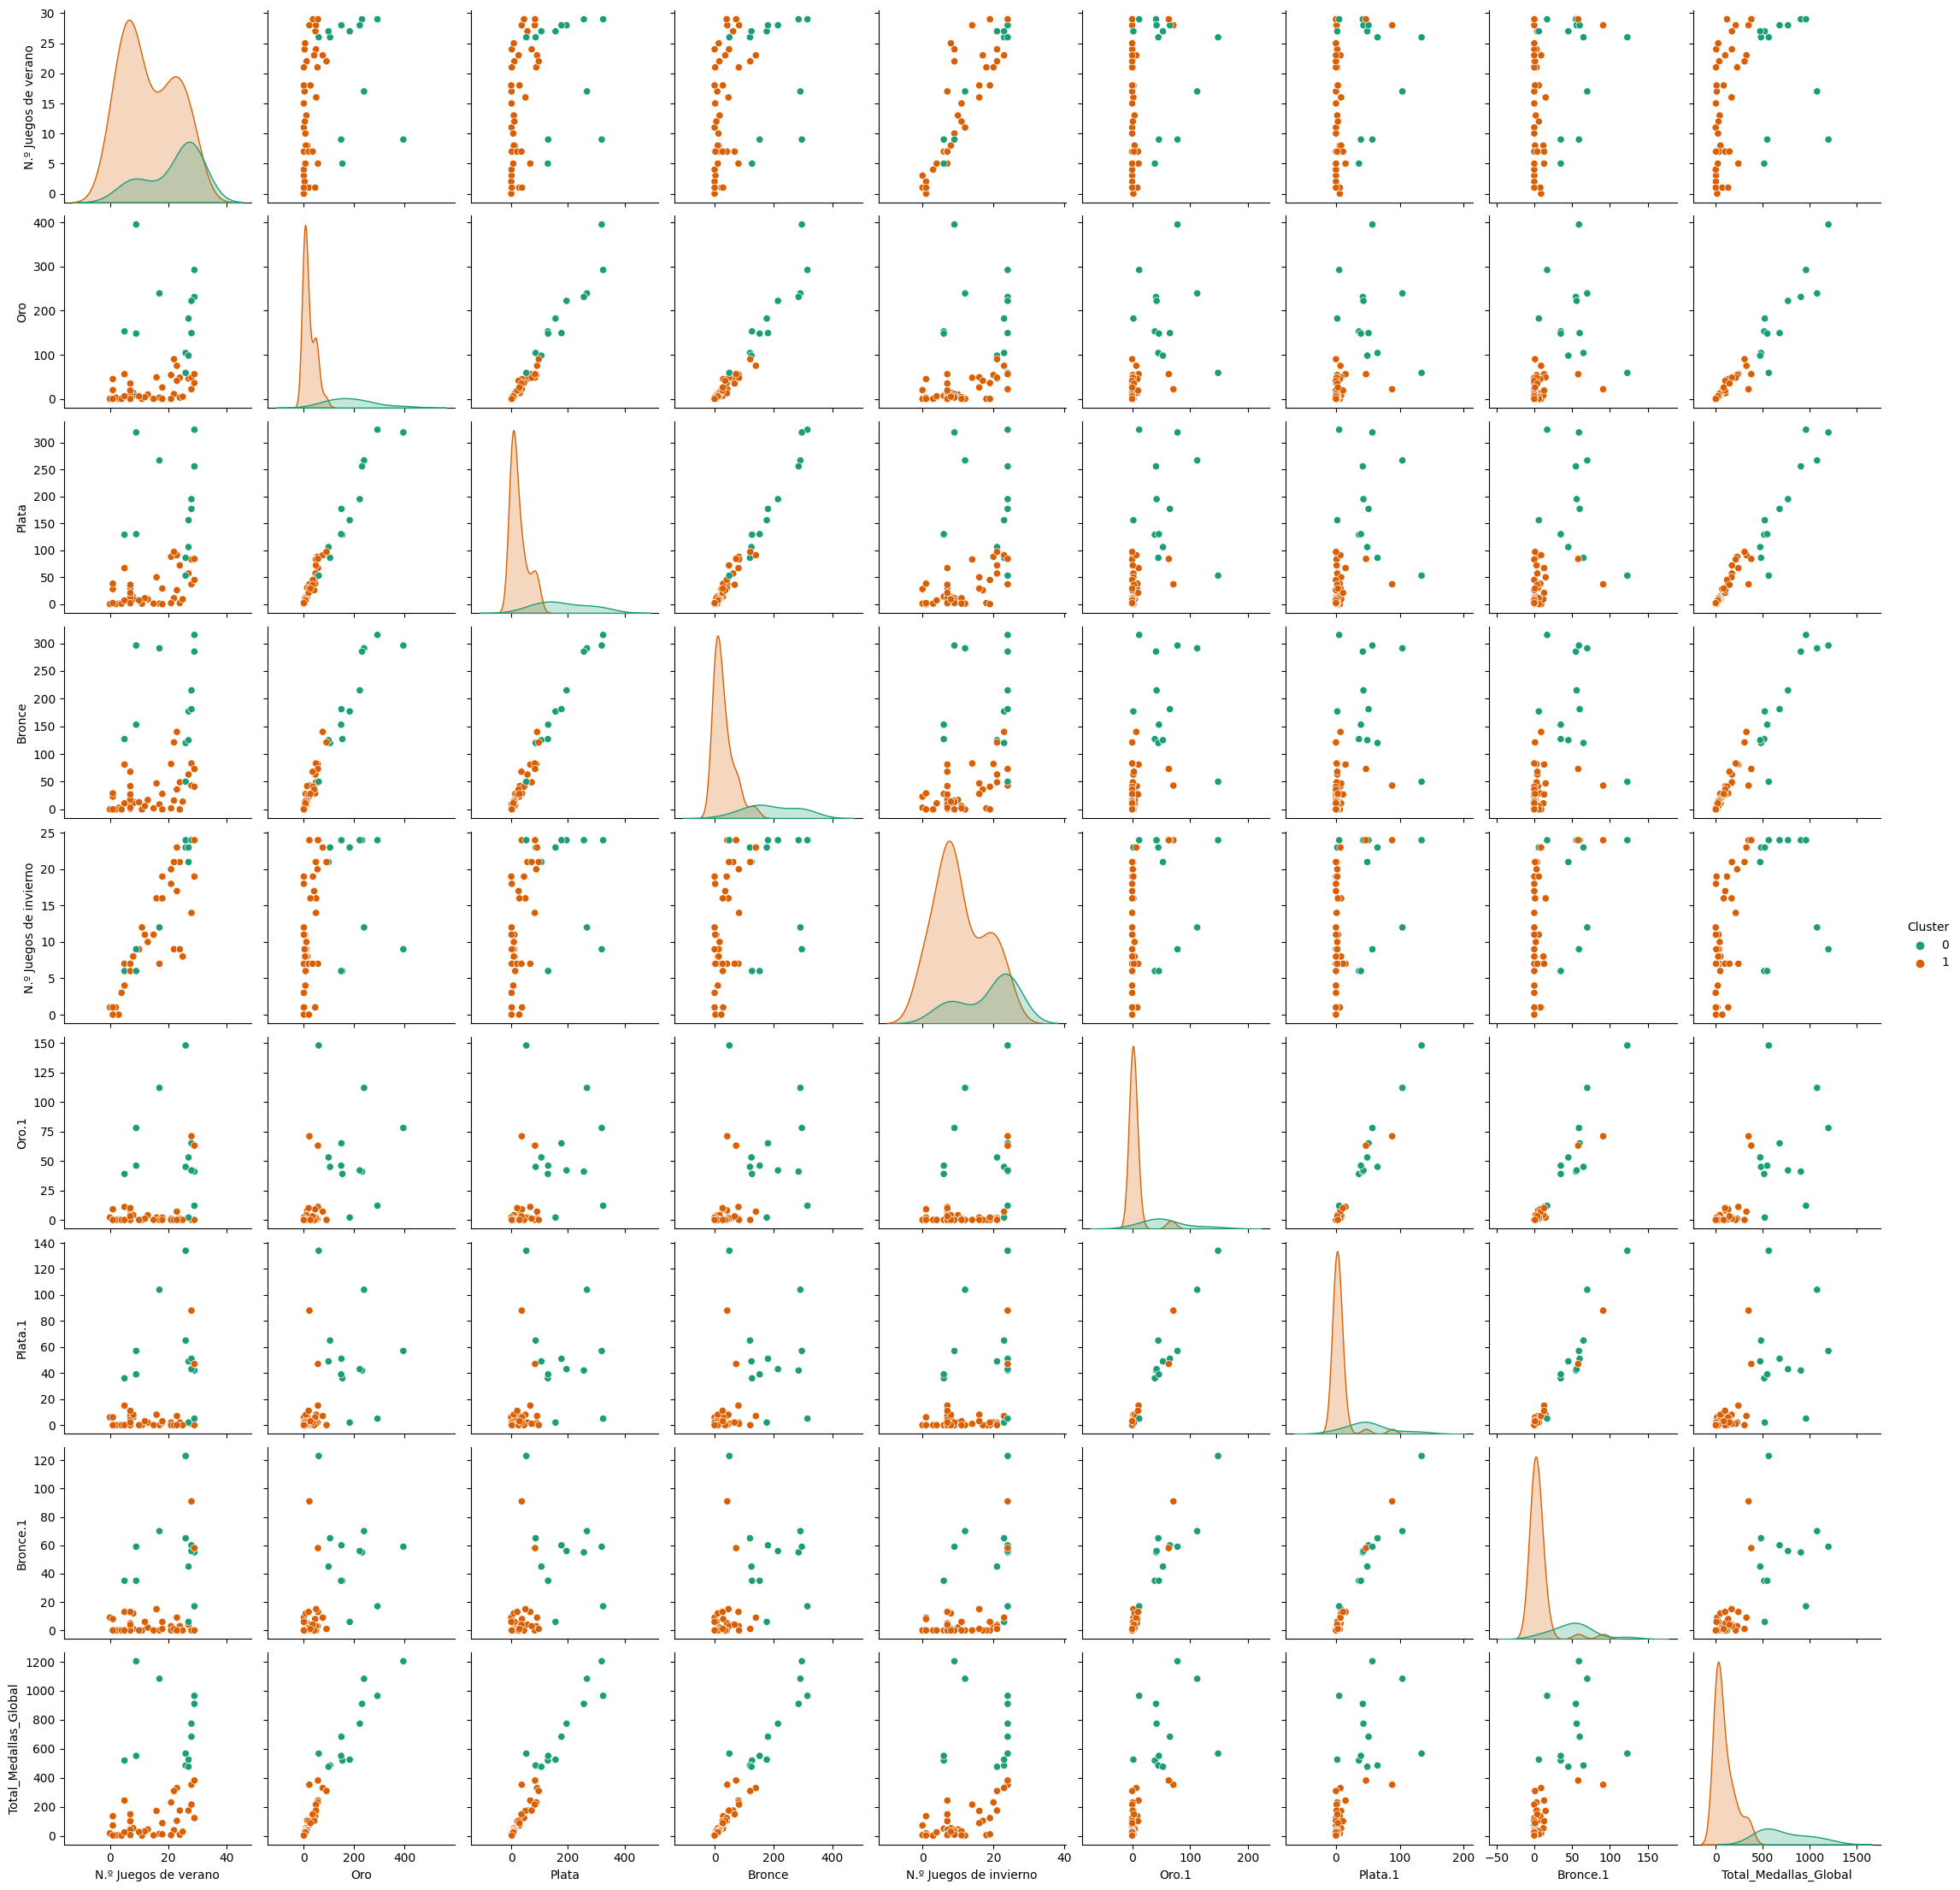

In [71]:
# Seleccionar columnas relevantes
selected_columns = ['N.º Juegos de verano', 'Oro', 'Plata', 'Bronce', 'N.º Juegos de invierno', 'Oro.1', 'Plata.1', 'Bronce.1', 'Total_Medallas_Global']
selected_data = data[selected_columns]

# K-means para crear clusters
kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster'] = kmeans.fit_predict(selected_data)

# Graficar la matriz de gráficos de dispersión con información de clusters
sns.pairplot(data[selected_columns + ['Cluster']], hue='Cluster', palette='Dark2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


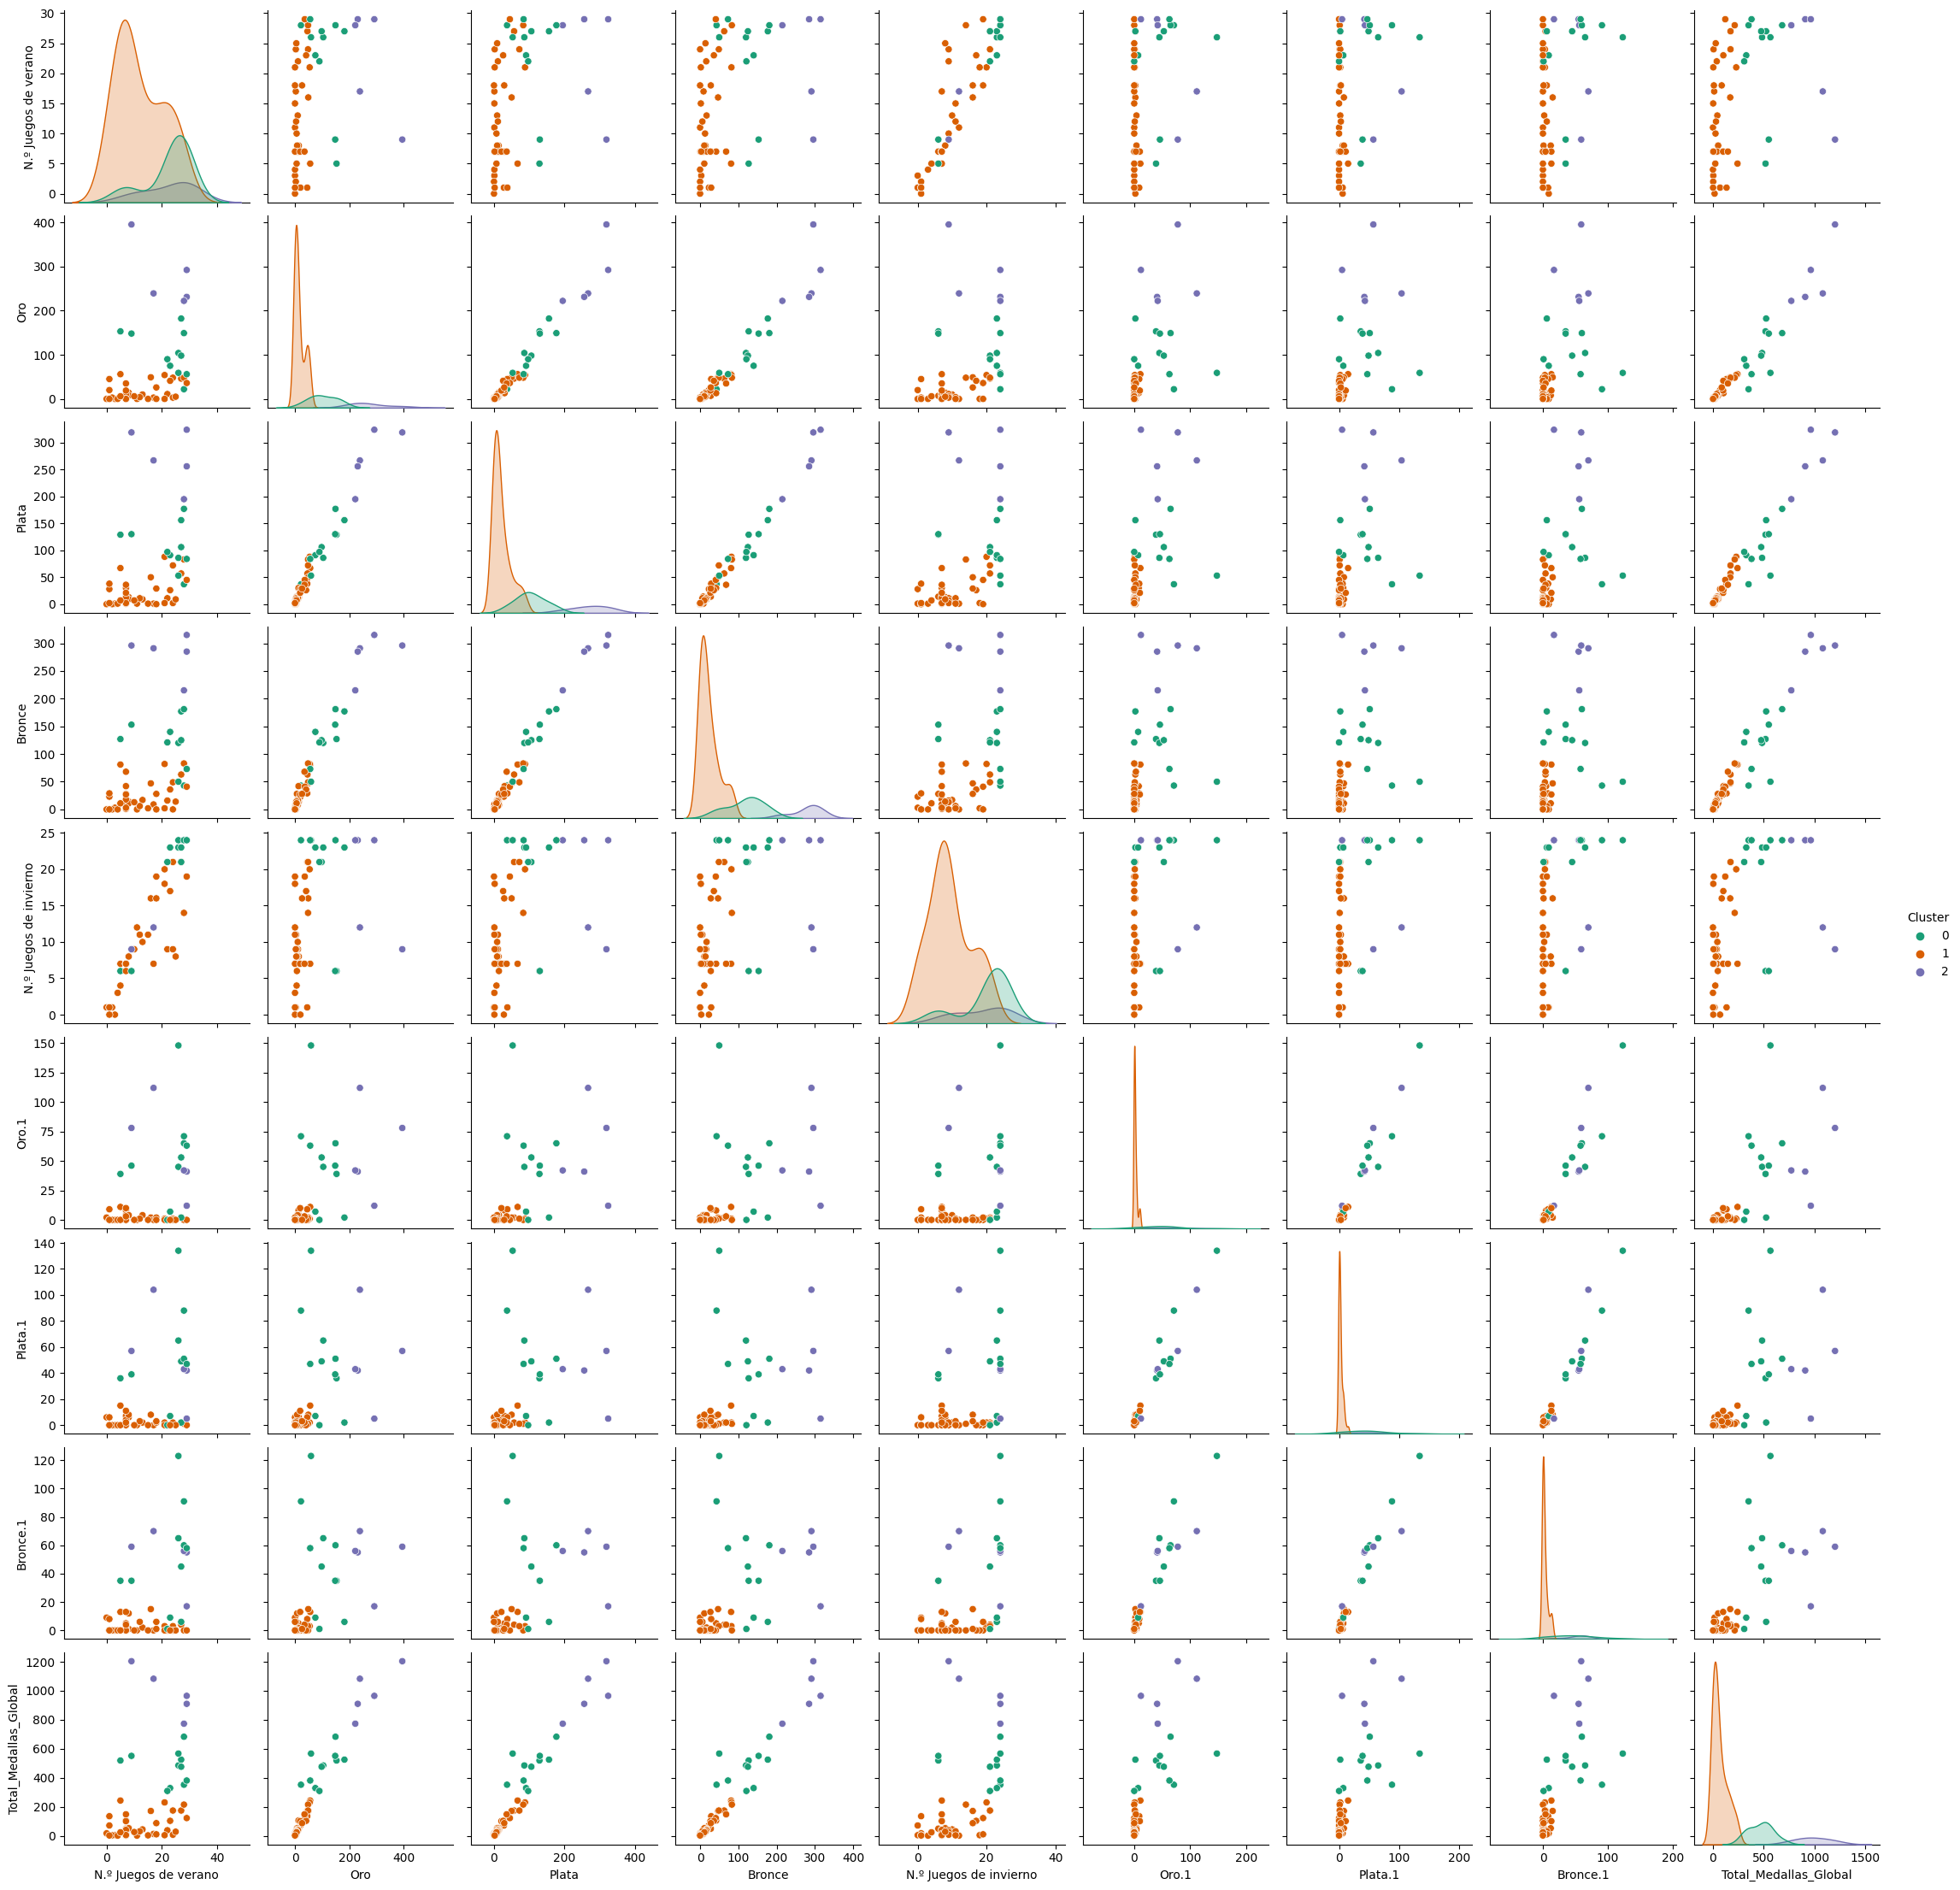

In [69]:
# Seleccionar columnas relevantes
selected_columns = ['N.º Juegos de verano', 'Oro', 'Plata', 'Bronce', 'N.º Juegos de invierno', 'Oro.1', 'Plata.1', 'Bronce.1', 'Total_Medallas_Global']
selected_data = data[selected_columns]

# K-means para crear clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(selected_data)

# Graficar la matriz de gráficos de dispersión con información de clusters
sns.pairplot(data[selected_columns + ['Cluster']], hue='Cluster', palette='Dark2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


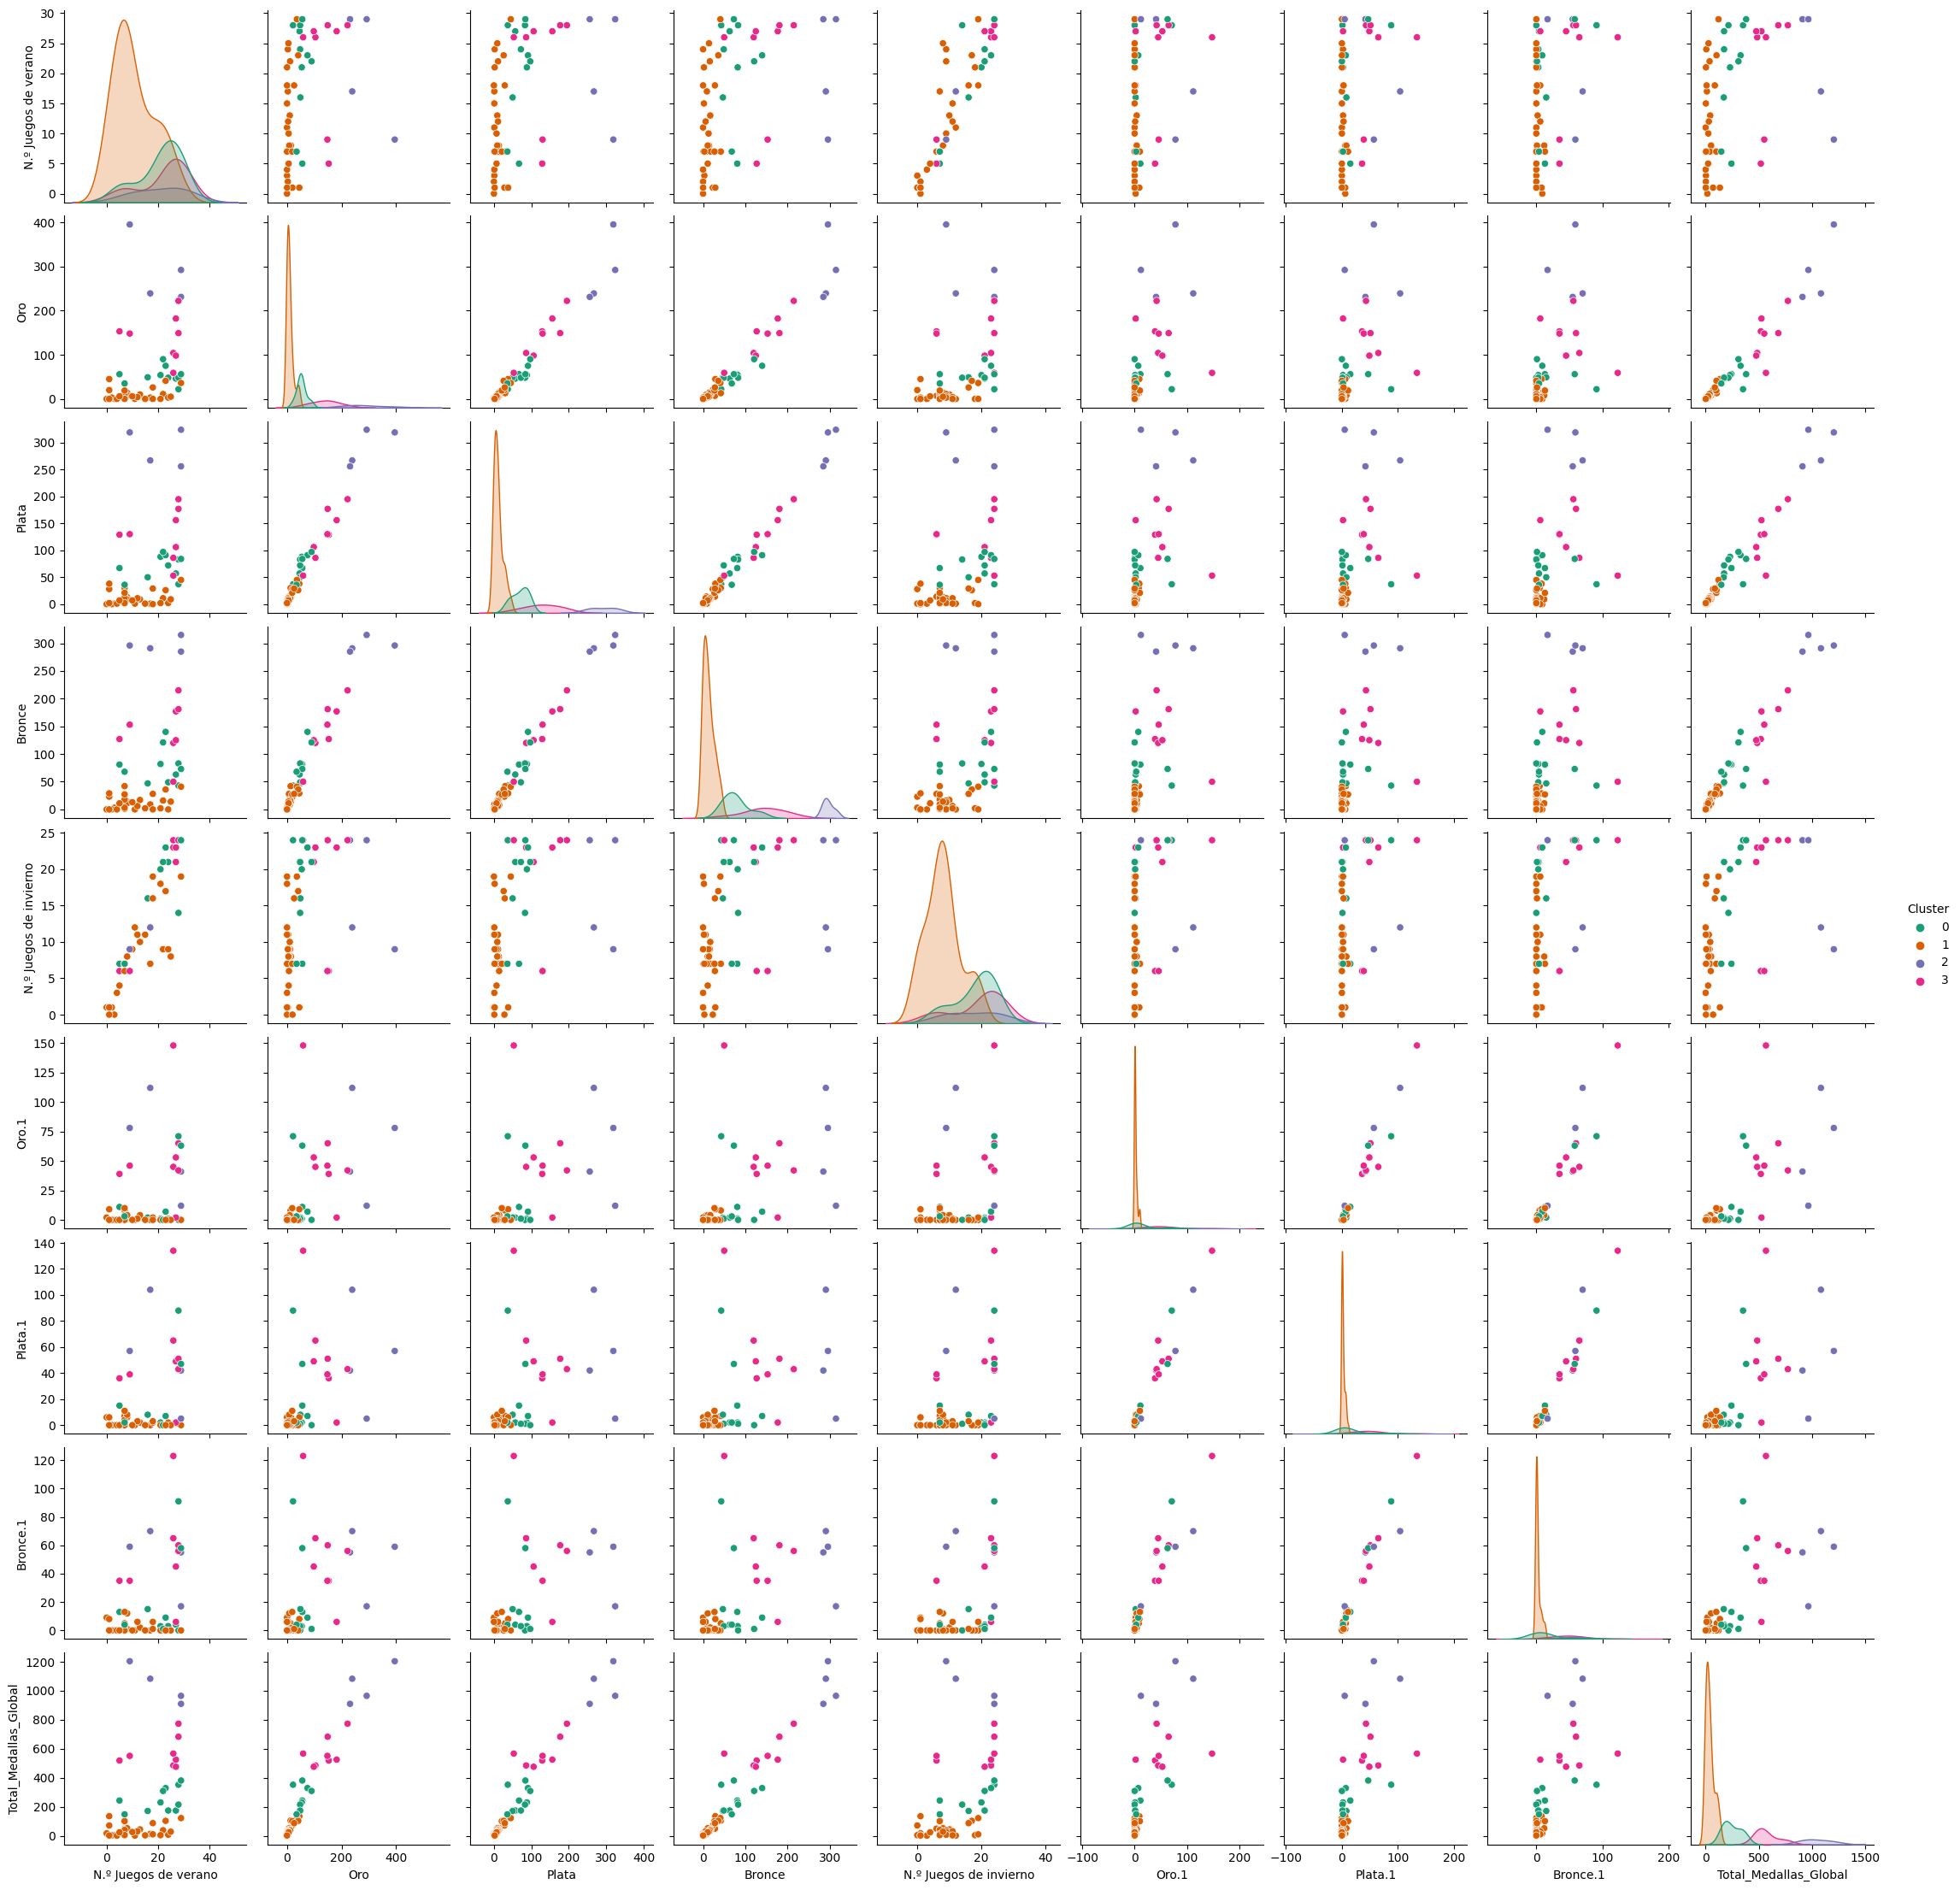

In [70]:
# Seleccionar columnas relevantes
selected_columns = ['N.º Juegos de verano', 'Oro', 'Plata', 'Bronce', 'N.º Juegos de invierno', 'Oro.1', 'Plata.1', 'Bronce.1', 'Total_Medallas_Global']
selected_data = data[selected_columns]

# K-means para crear clusters
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(selected_data)

# Graficar la matriz de gráficos de dispersión con información de clusters
sns.pairplot(data[selected_columns + ['Cluster']], hue='Cluster', palette='Dark2')
plt.show()

In [22]:
data[['N.º Juegos de verano','Oro','Plata','Bronce','Total_Medallas_Verano','N.º Juegos de invierno','Oro.1','Plata.1','Bronce.1','Total_Medallas_Invierno','N° Juegos Total','Oro.2','Plata.2','Bronce.2','Total_Medallas_Global']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-22-233c60525acf>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data[['N.º Juegos de verano','Oro','Plata','Bronce','Total_Medallas_Verano','N.º Juegos de invierno','Oro.1','Plata.1','Bronce.1','Total_Medallas_Invierno','N° Juegos Total','Oro.2','Plata.2','Bronce.2','Total_Medallas_Global']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,N.º Juegos de verano,Oro,Plata,Bronce,Total_Medallas_Verano,N.º Juegos de invierno,Oro.1,Plata.1,Bronce.1,Total_Medallas_Invierno,N° Juegos Total,Oro.2,Plata.2,Bronce.2,Total_Medallas_Global
N.º Juegos de verano,1.00,0.34,0.41,0.43,0.40,0.90,0.32,0.34,0.40,0.35,0.98,0.37,0.44,0.46,0.43
Oro,0.34,1.00,0.98,0.96,0.99,0.41,0.55,0.49,0.54,0.53,0.38,0.97,0.95,0.94,0.96
Plata,0.41,0.98,1.00,0.99,1.00,0.47,0.55,0.49,0.53,0.53,0.45,0.95,0.97,0.96,0.97
Bronce,0.43,0.96,0.99,1.00,0.99,0.49,0.54,0.50,0.54,0.53,0.47,0.94,0.96,0.97,0.96
Total_Medallas_Verano,0.40,0.99,1.00,0.99,1.00,0.46,0.55,0.50,0.54,0.54,0.44,0.96,0.97,0.97,0.97
N.º Juegos de invierno,0.90,0.41,0.47,0.49,0.46,1.00,0.39,0.41,0.49,0.43,0.97,0.44,0.51,0.54,0.50
Oro.1,0.32,0.55,0.55,0.54,0.55,0.39,1.00,0.98,0.96,0.99,0.36,0.74,0.74,0.71,0.73
Plata.1,0.34,0.49,0.49,0.50,0.50,0.41,0.98,1.00,0.98,1.00,0.38,0.69,0.70,0.68,0.69
Bronce.1,0.40,0.54,0.53,0.54,0.54,0.49,0.96,0.98,1.00,0.99,0.45,0.71,0.72,0.71,0.72
Total_Medallas_Invierno,0.35,0.53,0.53,0.53,0.54,0.43,0.99,1.00,0.99,1.00,0.40,0.72,0.73,0.71,0.72


In [29]:
data[['N.º Juegos de verano','Oro','Plata','Bronce','N.º Juegos de invierno','Oro.1','Plata.1','Bronce.1','Total_Medallas_Global']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-29-864d203133a2>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data[['N.º Juegos de verano','Oro','Plata','Bronce','N.º Juegos de invierno','Oro.1','Plata.1','Bronce.1','Total_Medallas_Global']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,N.º Juegos de verano,Oro,Plata,Bronce,N.º Juegos de invierno,Oro.1,Plata.1,Bronce.1,Total_Medallas_Global
N.º Juegos de verano,1.00,0.34,0.41,0.43,0.90,0.32,0.34,0.40,0.43
Oro,0.34,1.00,0.98,0.96,0.41,0.55,0.49,0.54,0.96
Plata,0.41,0.98,1.00,0.99,0.47,0.55,0.49,0.53,0.97
Bronce,0.43,0.96,0.99,1.00,0.49,0.54,0.50,0.54,0.96
N.º Juegos de invierno,0.90,0.41,0.47,0.49,1.00,0.39,0.41,0.49,0.50
Oro.1,0.32,0.55,0.55,0.54,0.39,1.00,0.98,0.96,0.73
Plata.1,0.34,0.49,0.49,0.50,0.41,0.98,1.00,0.98,0.69
Bronce.1,0.40,0.54,0.53,0.54,0.49,0.96,0.98,1.00,0.72
Total_Medallas_Global,0.43,0.96,0.97,0.96,0.50,0.73,0.69,0.72,1.00


> ## Interpretación de la matriz ?
Realizar estudiante

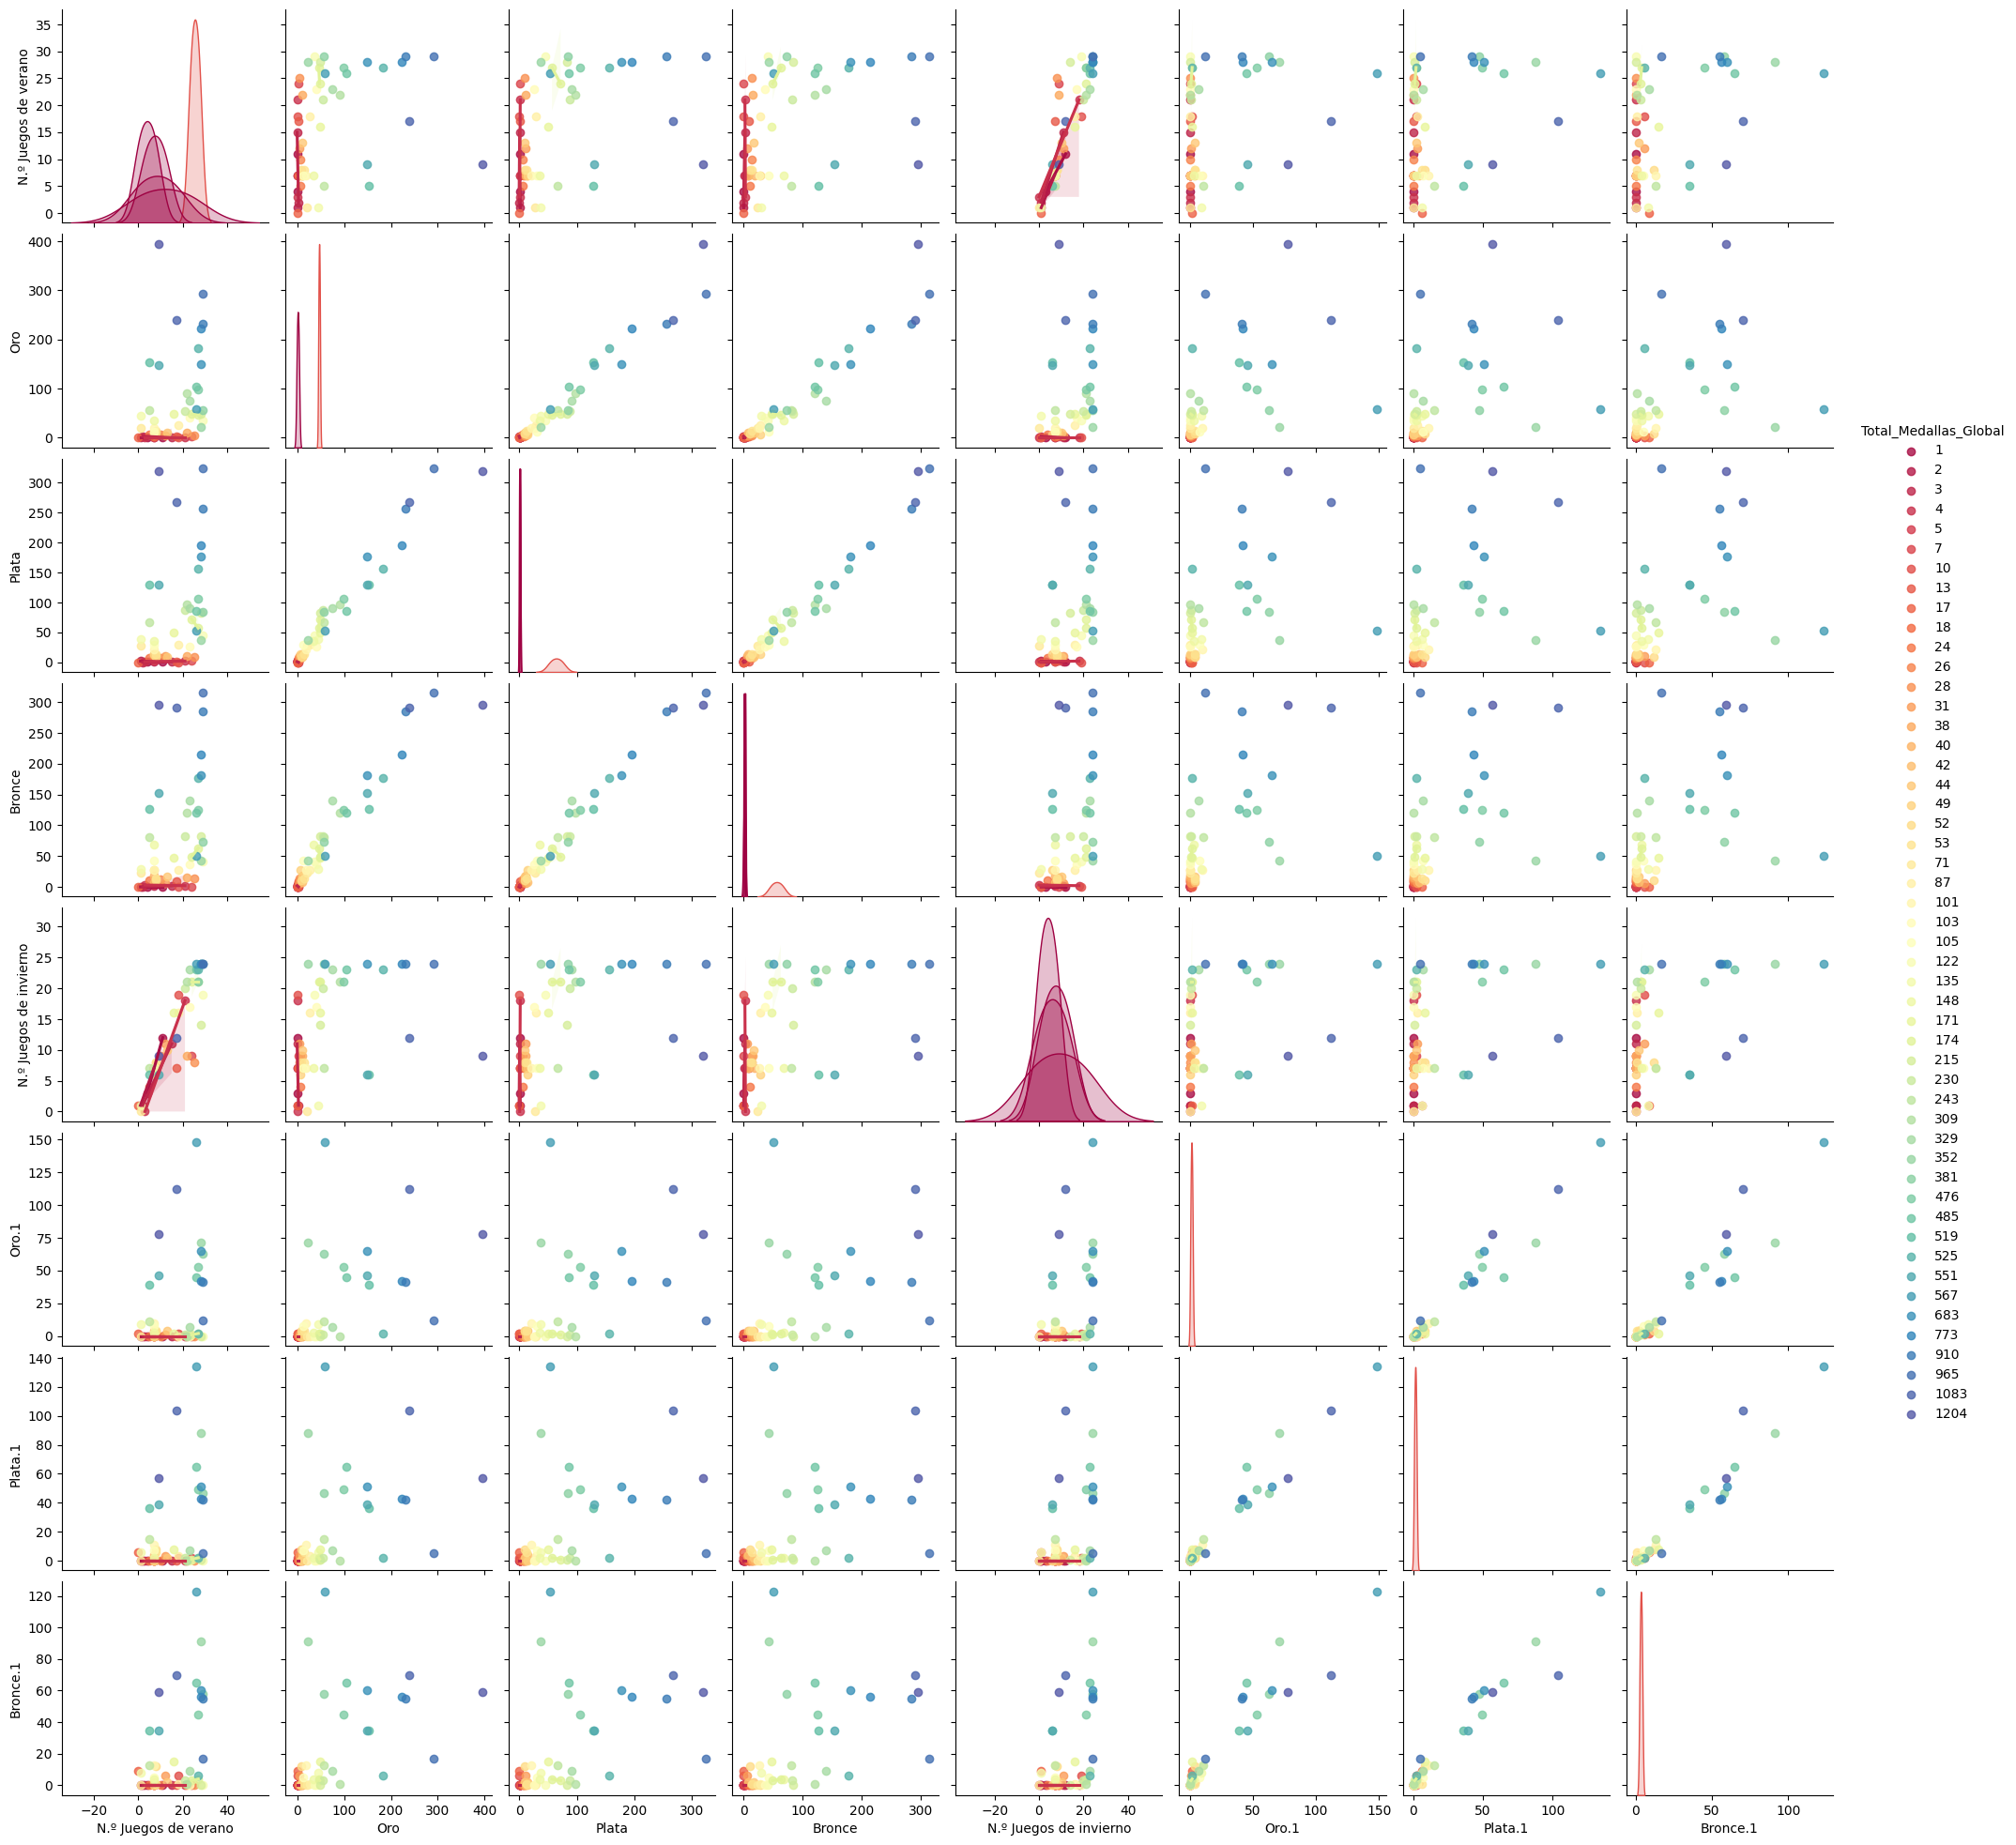

In [34]:
# Grafica de correlaciones respecto a los Estados
sns.pairplot(data[['N.º Juegos de verano','Oro','Plata','Bronce','N.º Juegos de invierno','Oro.1','Plata.1','Bronce.1','Total_Medallas_Global']],hue="Total_Medallas_Global", palette="Spectral",kind='reg')

> ## Interpretación de los gráficos ?
Realizar estudiante

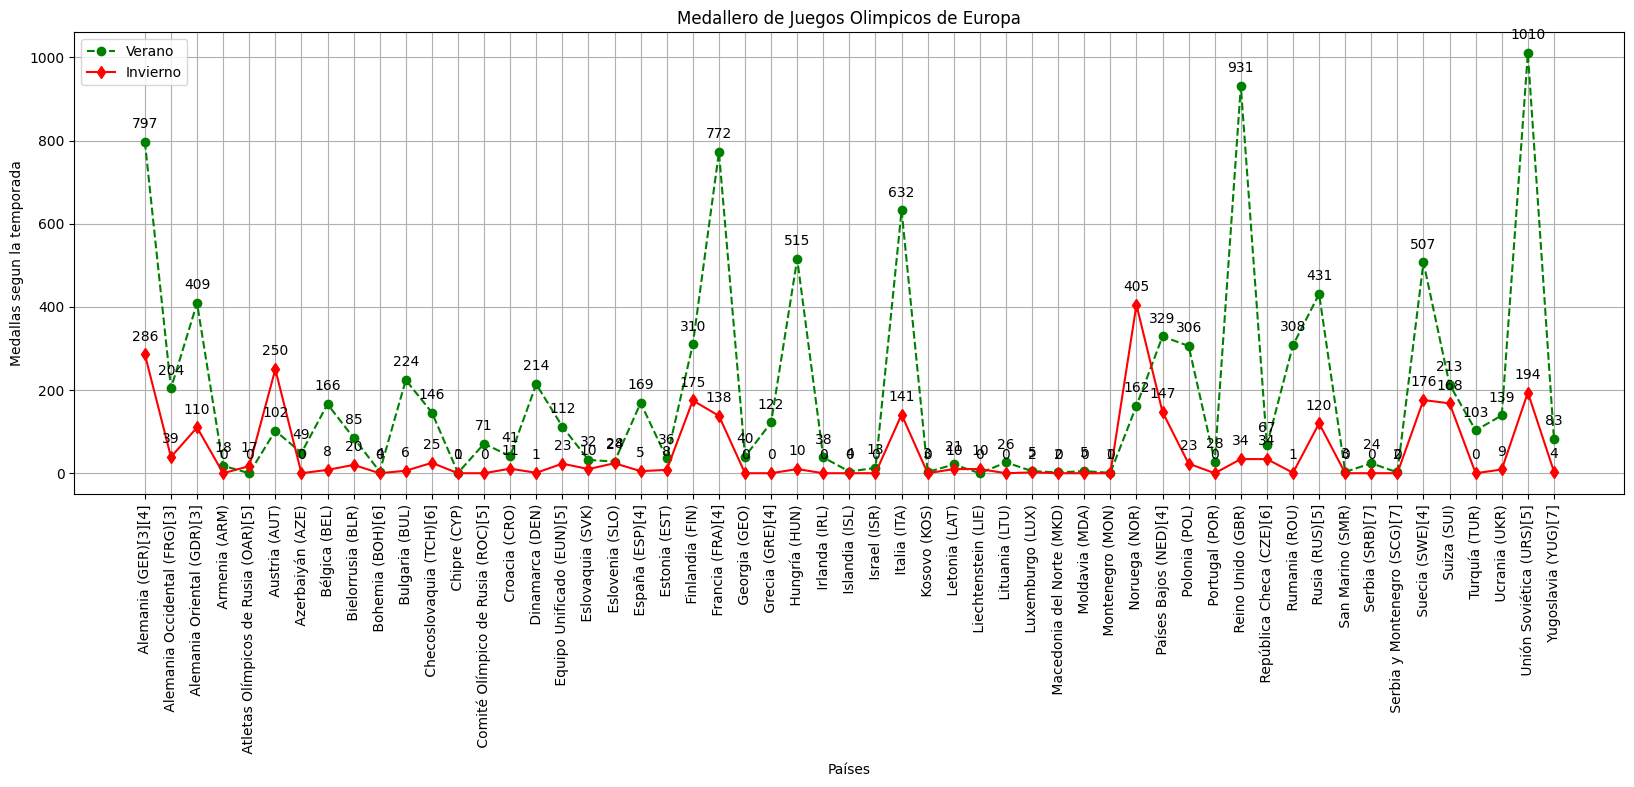

In [56]:
# Seleccción de variables significativas
# sel_data = data[['TJ','Pts.', 'PJ', 'PE', 'PP', 'GF', 'GC', 'Dif.', 'Títulos']]
#sel_data = data[['Pts.', 'PJ','GF', 'Dif.']]
#sel_data

# Acceder a las columnas para x e y
x = data['País'] #paises
y = data['Total_Medallas_Verano']# numero de medallas en verano

x1 = data['País'] #paises
y1 = data['Total_Medallas_Invierno']# numero de medallas en Invierno

#x2 = data['País'] #paises
#y2 = data['Total_Medallas_Global']# numero de medallas en total

# Ajustar la longitud del diagrama en el eje x
plt.figure(figsize=(20, 6))

#plotting
plt.plot(x, y, marker='o', linestyle='--', color='g', label='Verano')
plt.plot(x1, y1, marker='d', linestyle='-', color='r', label='Invierno')
#plt.plot(x2, y2, marker='s', linestyle='-.', color='b', label='Global')

#agregar etiquetas
plt.xlabel('Países')
plt.ylabel('Medallas segun la temporada')
plt.title('Medallero de Juegos Olimpicos de Europa')
plt.legend(loc='upper left')

# Cambiar la orientación de los nombres del eje x
plt.xticks(rotation=90)

# Agregar cuadrícula
plt.grid(True)

# Anotar los puntos con información al pasar el cursor
for i, txt in enumerate(y):
    plt.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Anotar los puntos con información al pasar el cursor
for i, txt in enumerate(y1):
    plt.annotate(txt, (x1[i], y1[i]), textcoords="offset points", xytext=(0,10), ha='center')



#mostrar grafica
plt.show()


In [61]:
# Obtener los tres datos mayores de la columna 'Valor'
top3_datos = data.nlargest(3, 'Total_Medallas_Verano')

top3_datos

,País,N.º Juegos de verano,Oro,Plata,Bronce,Total_Medallas_Verano,N.º Juegos de invierno,Oro.1,Plata.1,Bronce.1,Total_Medallas_Invierno,N° Juegos Total,Oro.2,Plata.2,Bronce.2,Total_Medallas_Global
53,Unión Soviética (URS)[5],9,395,319,296,1010,9,78,57,59,194,18,473,376,355,1204
42,Reino Unido (GBR),29,292,324,315,931,24,12,5,17,34,53,304,329,332,965
0,Alemania (GER)[3][4],17,239,267,291,797,12,112,104,70,286,29,351,371,361,1083


In [62]:
# Obtener los tres datos mayores de la columna 'Valor'
top3_datos = data.nlargest(3, 'Total_Medallas_Invierno')

top3_datos

,País,N.º Juegos de verano,Oro,Plata,Bronce,Total_Medallas_Verano,N.º Juegos de invierno,Oro.1,Plata.1,Bronce.1,Total_Medallas_Invierno,N° Juegos Total,Oro.2,Plata.2,Bronce.2,Total_Medallas_Global
38,Noruega (NOR),26,59,53,50,162,24,148,134,123,405,50,207,187,173,567
0,Alemania (GER)[3][4],17,239,267,291,797,12,112,104,70,286,29,351,371,361,1083
5,Austria (AUT),28,22,37,43,102,24,71,88,91,250,52,93,125,134,352


In [63]:
# Obtener los tres datos mayores de la columna 'Valor'
top3_datos = data.nlargest(3, 'Total_Medallas_Global')

top3_datos

,País,N.º Juegos de verano,Oro,Plata,Bronce,Total_Medallas_Verano,N.º Juegos de invierno,Oro.1,Plata.1,Bronce.1,Total_Medallas_Invierno,N° Juegos Total,Oro.2,Plata.2,Bronce.2,Total_Medallas_Global
53,Unión Soviética (URS)[5],9,395,319,296,1010,9,78,57,59,194,18,473,376,355,1204
0,Alemania (GER)[3][4],17,239,267,291,797,12,112,104,70,286,29,351,371,361,1083
42,Reino Unido (GBR),29,292,324,315,931,24,12,5,17,34,53,304,329,332,965


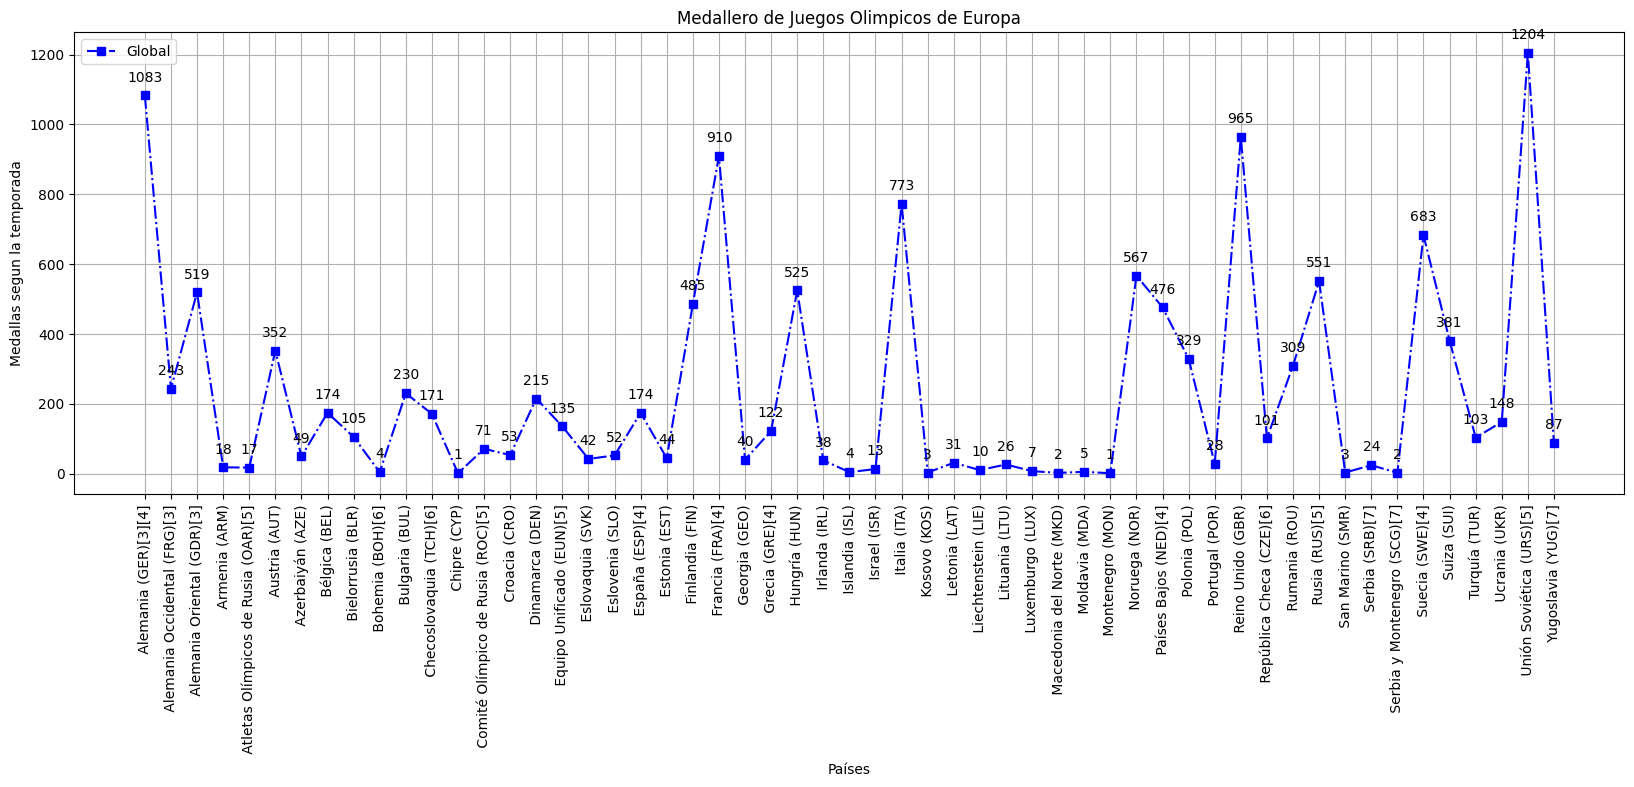

In [64]:
# Seleccción de variables significativas
# sel_data = data[['TJ','Pts.', 'PJ', 'PE', 'PP', 'GF', 'GC', 'Dif.', 'Títulos']]
#sel_data = data[['Pts.', 'PJ','GF', 'Dif.']]
#sel_data

# Acceder a las columnas para x e y
#x = data['País'] #paises
#y = data['Total_Medallas_Verano']# numero de medallas en verano

#x1 = data['País'] #paises
#y1 = data['Total_Medallas_Invierno']# numero de medallas en Invierno

x2 = data['País'] #paises
y2 = data['Total_Medallas_Global']# numero de medallas en total

# Ajustar la longitud del diagrama en el eje x
plt.figure(figsize=(20, 6))

#plotting
#plt.plot(x, y, marker='o', linestyle='--', color='g', label='Verano')
#plt.plot(x1, y1, marker='d', linestyle='-', color='r', label='Invierno')
plt.plot(x2, y2, marker='s', linestyle='-.', color='b', label='Global')

#agregar etiquetas
plt.xlabel('Países')
plt.ylabel('Medallas segun la temporada')
plt.title('Medallero de Juegos Olimpicos de Europa')
plt.legend(loc='upper left')

# Cambiar la orientación de los nombres del eje x
plt.xticks(rotation=90)

# Agregar cuadrícula
plt.grid(True)

# Anotar los puntos con información al pasar el cursor
for i, txt in enumerate(y2):
    plt.annotate(txt, (x2[i], y2[i]), textcoords="offset points", xytext=(0,10), ha='center')



#mostrar grafica
plt.show()

In [58]:
sel_data = data[['N.º Juegos de verano','Oro','Plata','Bronce','N.º Juegos de invierno','Oro.1','Plata.1','Bronce.1','Total_Medallas_Global']]
sel_data

,N.º Juegos de verano,Oro,Plata,Bronce,N.º Juegos de invierno,Oro.1,Plata.1,Bronce.1,Total_Medallas_Global
0,17,239,267,291,12,112,104,70,1083
1,5,56,67,81,7,11,15,13,243
2,5,153,129,127,6,39,36,35,519
3,7,2,8,8,7,0,0,0,18
4,0,0,0,0,1,2,6,9,17
5,28,22,37,43,24,71,88,91,352
6,7,7,14,28,6,0,0,0,49
7,27,46,57,63,21,2,2,4,174
8,7,13,30,42,7,8,7,5,105
9,3,0,1,3,0,0,0,0,4


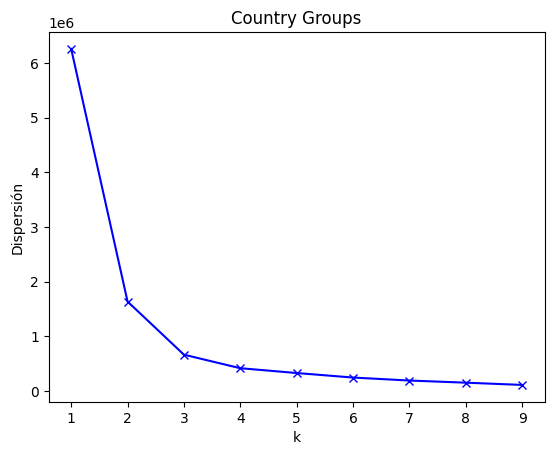

In [59]:
# Analsis de Dispersión por método de Codo
def plot_dispersion(x, figure_name, max_k = 10, n_init = 10):
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, max_k), inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel(u'Dispersión')
    plt.title(figure_name)

plot_dispersion(sel_data, 'Country Groups')

> ## Interpretación del gráfico ?
Realizar estudiante

3 clusters es optimo para realizar los analisis pertinentes